### Model-Based Preprocessing

In [43]:
import pandas as pd

# load data
df = pd.read_csv('Data/C001_FakeHypotension.csv')
df.head()

,Unnamed: 0,MAP,diastolic_bp,systolic_bp,urine,ALT,AST,PO2,lactic_acid,serum_creatinine,...,GCS_total,urine_m,ALT_AST_m,FiO2_m,GCS_total_m,PO2_m,lactic_acid_m,serum_creatinine_m,PatientID,Timepoints
0,0,67.964940,56.709198,144.578430,241.00052,24.226444,23.811718,83.46306,1.477299,0.893153,...,15,0,0,0,1,0,0,0,0,0
1,1,63.603493,53.635162,143.283780,230.52171,23.933348,30.188170,120.01681,1.733099,0.862924,...,15,0,0,0,0,0,0,0,0,1
2,2,65.750670,56.904236,143.534000,217.76741,21.803823,26.318861,84.16420,1.375228,0.819521,...,15,0,0,0,0,0,0,0,0,2
3,3,44.684580,41.952940,117.236534,291.90466,33.613720,24.136852,102.35325,1.252799,0.754315,...,15,1,0,0,0,0,0,0,0,3
4,4,61.486233,63.960106,111.537060,435.26230,45.407272,23.192320,63.73771,1.845126,1.155209,...,15,0,0,0,1,0,0,0,0,4


In [ ]:
# columns for states and actions
action_columns = ["fluid_boluses", "vasopressors"]
state_columns = ["MAP", "diastolic_bp", "systolic_bp", "urine", "ALT", "AST", "PO2", "lactic_acid", "serum_creatinine", "FiO2", 
          "GCS_total"]

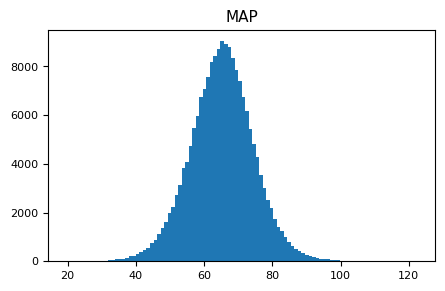

Min: 19.392052
Max: 122.63299
Average: 65.24478577575661
Standard Deviation: 9.331872470777064




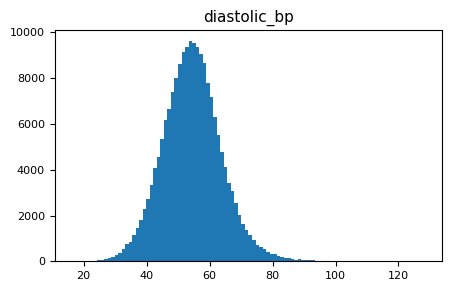

Min: 16.42613
Max: 128.29489
Average: 54.53406438683396
Standard Deviation: 9.393272237571988




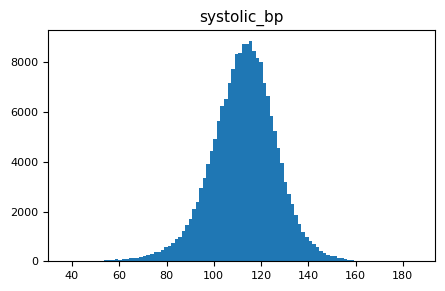

Min: 37.250717
Max: 186.29512
Average: 112.61721504659526
Standard Deviation: 14.001782821968984




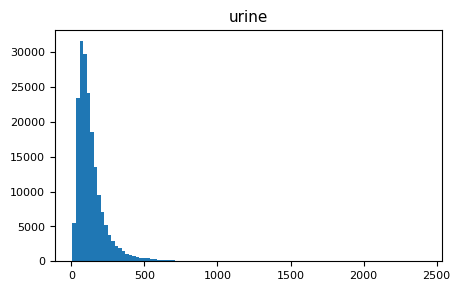

Min: 6.7349668
Max: 2419.2454
Average: 134.82951059155636
Standard Deviation: 106.49927603971628




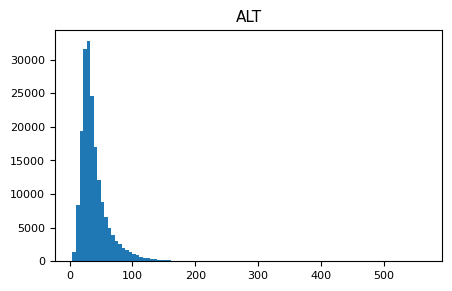

Min: 4.4271393
Max: 565.5222
Average: 39.188745477165924
Standard Deviation: 23.977531374662952




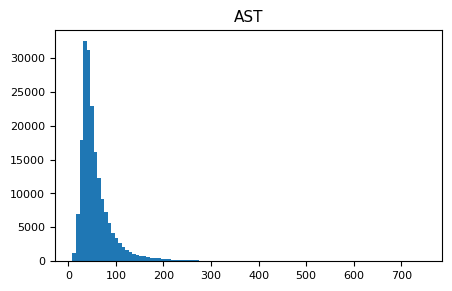

Min: 8.623325
Max: 749.3293
Average: 59.1528828795956
Standard Deviation: 41.45965721865672




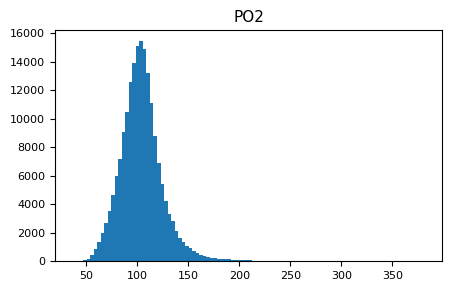

Min: 36.558357
Max: 381.82248
Average: 104.41759479013746
Standard Deviation: 21.525885548333907




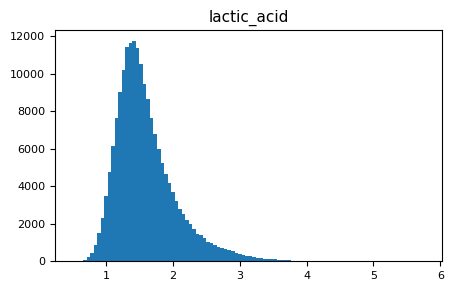

Min: 0.4954983
Max: 5.766668
Average: 1.5963214295118817
Standard Deviation: 0.46051106802228264




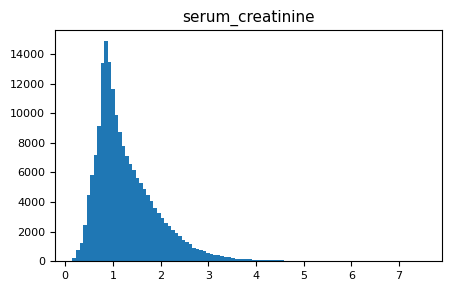

Min: 0.1529864
Max: 7.5403175
Average: 1.2977292914797527
Standard Deviation: 0.6876770453218878




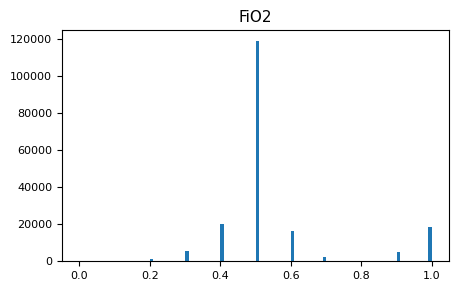

Min: 0.0
Max: 1.0
Average: 0.5529108056265984
Standard Deviation: 0.17336343333568324




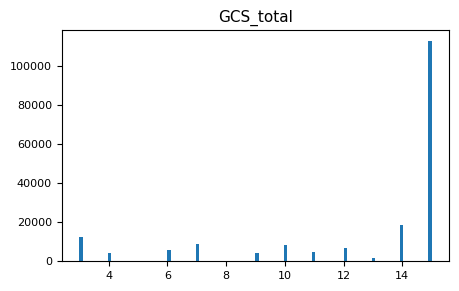

Min: 3
Max: 15
Average: 12.645012787723784
Standard Deviation: 3.8470145776911187




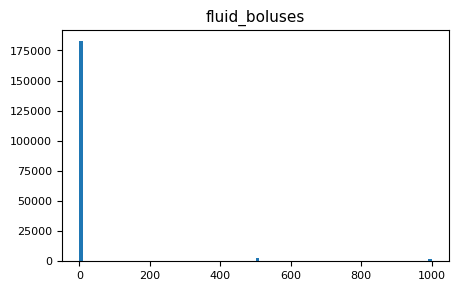

Min: 0
Max: 1000
Average: 17.42593776641091
Standard Deviation: 113.81422903526308




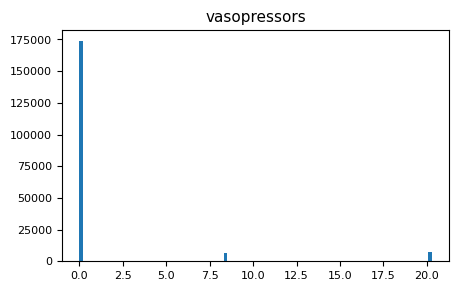

Min: 0.0
Max: 20.28
Average: 1.0870678583173485
Standard Deviation: 4.145758108249978




In [45]:
import matplotlib.pyplot as plt

for column in state_columns + action_columns:
    plt.figure(figsize=(5, 3))
    plt.hist(df[column], bins=100)
    plt.title(column, size=11)
    plt.tick_params(labelsize=8)
    plt.show()
    min_value = df[column].min()
    max_value = df[column].max()
    average = df[column].mean()
    std_dev = df[column].std()

    print(f'Min: {min_value}')
    print(f'Max: {max_value}')
    print(f'Average: {average}')
    print(f'Standard Deviation: {std_dev}')
    print("\n")   

In [46]:
# bin the variables
binned_df = pd.DataFrame()

map_bins = [-1, 55, 60, 65, 130] # 0: (0,55), 1: (55,60), 2: (60,65), 3:(>65)
binned_df['MAP'] = pd.cut(df['MAP'], bins=map_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'])

dbp_bins = [-1, 40, 60, 80, 130]
binned_df['diastolic_bp'] = pd.cut(df['diastolic_bp'], bins=dbp_bins, labels=['Severely Low', 'Low', 'Normal', 'High'])

sbp_bins = [-1, 90, 120, 200]
binned_df['systolic_bp'] = pd.cut(df['systolic_bp'], bins=sbp_bins, labels=['Low', 'Normal', 'High'])

urine_bins = [-1, 30, 83, 2500] # 0: (0,30), 1: (30, 83), 2: (83, 2500)
binned_df['urine'] = pd.cut(df['urine'], bins=urine_bins, labels=['Severely Low', 'Low', 'Normal'])

alt_bins = [-1, 40, 120, 300, 1000]
binned_df['ALT'] = pd.cut(df['ALT'], bins=alt_bins, labels=['Normal', 'Slightly High', 'High', 'Severely High'])

ast_bins = [-1, 40, 120, 300, 1000]
binned_df['AST'] = pd.cut(df['AST'], bins=ast_bins, labels=['Normal', 'Slightly High', 'High', 'Severely High'])

pf_bins = [-1, 100, 200, 300, 1000]
binned_df['p_f_ratio'] = pd.cut(df['PO2'] / df['FiO2'], bins=pf_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'])

la_bins = [-1, 2.2, 4, 6]
binned_df['lactic_acid'] = pd.cut(df['lactic_acid'], bins=la_bins, labels=['Normal', 'High', 'Severely High'])

sc_bins = [-1, 1.2, 2, 3.5, 5, 8]
binned_df['serum_creatinine'] = pd.cut(df['serum_creatinine'], bins=sc_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])

gcs_bins = [0, 7, 10, 14, 15]
binned_df['GCS_total'] = pd.cut(df['GCS_total'], bins=gcs_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'])

boluses_bins = [-1, 200, 400, 600, 1001]
binned_df['fluid_boluses'] = pd.cut(df['fluid_boluses'], bins=boluses_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'])

vasopressors_bins = [-1, 1e-07, 1e-05, 8.5, 21]
binned_df['vasopressors'] = pd.cut(df['vasopressors'], bins=vasopressors_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'])


In [47]:
# add binary indicators
for col in state_columns:
    if col in ["PO2", "FiO2"]:
        continue
    if col not in binned_df.columns.tolist():
        binned_df[col] = df[col]

In [48]:
print(sorted(df['fluid_boluses'].unique()))
print(sorted(df['vasopressors'].unique()))

[0, 250, 500, 1000]
[0.0, 1e-06, 8.4, 20.28]


In [49]:
# check data
binned_df.head()

,MAP,diastolic_bp,systolic_bp,urine,ALT,AST,p_f_ratio,lactic_acid,serum_creatinine,GCS_total,fluid_boluses,vasopressors
0,Level 4,Low,High,Normal,Normal,Normal,Level 1,Normal,Level 1,Level 4,Level 1,Level 1
1,Level 3,Low,High,Normal,Normal,Normal,Level 2,Normal,Level 1,Level 4,Level 1,Level 1
2,Level 4,Low,High,Normal,Normal,Normal,Level 1,Normal,Level 1,Level 4,Level 1,Level 1
3,Level 1,Low,Normal,Normal,Normal,Normal,Level 2,Normal,Level 1,Level 4,Level 1,Level 1
4,Level 3,Normal,Normal,Normal,Slightly High,Normal,Level 1,Normal,Level 1,Level 4,Level 1,Level 1


In [50]:
processed_df = pd.DataFrame()

for column in binned_df.columns.tolist():
    processed_df[column] = pd.Categorical(binned_df[column]).codes

#time series
processed_df['PatientID'] = df['PatientID']
processed_df['Timepoints'] = df['Timepoints']

In [51]:
processed_df['urine'].value_counts()

2    122051
1     60615
0      5014
Name: urine, dtype: int64

In [52]:
processed_df.head()

,MAP,diastolic_bp,systolic_bp,urine,ALT,AST,p_f_ratio,lactic_acid,serum_creatinine,GCS_total,fluid_boluses,vasopressors,PatientID,Timepoints
0,3,1,2,2,0,0,0,0,0,3,0,0,0,0
1,2,1,2,2,0,0,1,0,0,3,0,0,0,1
2,3,1,2,2,0,0,0,0,0,3,0,0,0,2
3,0,1,1,2,0,0,1,0,0,3,0,0,0,3
4,2,2,1,2,1,0,0,0,0,3,0,0,0,4


In [53]:
print(sorted(processed_df['p_f_ratio'].unique()))
print(sorted(processed_df['GCS_total'].unique()))
print(sorted(processed_df['serum_creatinine'].unique()))
print(sorted(processed_df['lactic_acid'].unique()))
print(sorted(processed_df['AST'].unique()))
print(sorted(processed_df['urine'].unique()))
print(sorted(processed_df['systolic_bp'].unique()))
print(sorted(processed_df['diastolic_bp'].unique()))
print(sorted(processed_df['MAP'].unique()))
print(sorted(processed_df['fluid_boluses'].unique()))
print(sorted(processed_df['vasopressors'].unique()))

[-1, 0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]


In [57]:
processed_df.to_csv("Data/binned_df.csv")

In [55]:
binned_state_columns = [c for c in processed_df.columns if c not in action_columns]
binned_state_columns = [c for c in binned_state_columns if c not in ["PatientID", "Timepoints"]]
num_states = len(processed_df[binned_state_columns].value_counts())
num_actions = len(processed_df[action_columns].value_counts())
print(num_states)
print(num_actions)

11937
16


In [56]:
processed_df['MAP'].value_counts()

3    96822
2    39300
1    27322
0    24236
Name: MAP, dtype: int64